## Importing necessary packages

In [1]:
library(tidyverse)
library(factoextra)
library(cluster)
library(NbClust) 
library(fpc) 
library(dendroextras)
library(dendextend) 
library(mclust)  
library(dbscan)
library(dplyr)
library(arulesViz)
library(arulesCBA)
library(arules)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ

Attaching package: 'dendroextras'

The following object is masked from 'package:dplyr':

    slice


---------------------
Welcome to dendextend version 1.8.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPa

## Importing dataset

In [2]:
skin<-read.csv("C:/Users/fadhi/Desktop/Stat 517/Final Project/Skin_HAM10000.csv")

In [3]:
sk <- skin[1:192] # Removing label information
sk

pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0182,pixel0183,pixel0184,pixel0185,pixel0186,pixel0187,pixel0188,pixel0189,pixel0190,pixel0191
199,156,188,210,165,198,216,176,203,215,...,189,214,167,191,199,157,175,184,143,167
115,87,115,180,133,158,200,153,187,215,...,199,207,167,188,177,128,138,74,51,60
203,146,164,209,144,153,217,160,181,215,...,189,211,160,175,199,152,172,177,138,158
135,96,110,198,141,156,208,148,158,210,...,149,179,141,157,153,122,138,58,39,46
204,156,187,232,185,216,236,196,220,217,...,212,236,189,213,233,182,209,207,175,188
26,13,18,175,147,152,247,220,231,248,...,131,207,151,184,101,69,84,2,0,0
201,156,149,204,157,150,206,155,151,209,...,175,217,168,172,214,166,169,211,162,166
174,129,118,189,139,136,201,147,140,207,...,164,206,160,161,197,151,146,133,97,91
175,122,127,199,138,152,214,159,181,219,...,168,202,140,155,195,134,144,121,80,83
220,163,175,216,152,169,230,172,187,232,...,204,234,180,198,227,167,181,218,146,155


## Association rules for the entire dataset

In [5]:
sk_dsz<-discretizeDF(sk)
sk_rules<-apriori(sk_dsz)
summary(sk_rules)
#inspect(sk_rules) Taking too long to run since it is a large dataset

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1001 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[576 item(s), 10015 transaction(s)] done [0.45s].
sorting and recoding items ... [576 item(s)] done [0.13s].
creating transaction tree ... done [0.02s].
checking subsets of size 1 2 3

Warning message in apriori(sk_dsz):
"Mining stopped (time limit reached). Only patterns up to a length of 3 returned!"

 done [41.07s].
writing ... [1452004 rule(s)] done [0.72s].
creating S4 object  ... done [0.59s].


set of 1452004 rules

rule length distribution (lhs + rhs):sizes
      2       3 
   3232 1448772 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   2.998   3.000   3.000 

summary of quality measures:
    support         confidence          lift           count     
 Min.   :0.1000   Min.   :0.8000   Min.   :2.296   Min.   :1002  
 1st Qu.:0.1105   1st Qu.:0.8282   1st Qu.:2.472   1st Qu.:1107  
 Median :0.1256   Median :0.8583   Median :2.565   Median :1258  
 Mean   :0.1429   Mean   :0.8628   Mean   :2.579   Mean   :1432  
 3rd Qu.:0.1699   3rd Qu.:0.8923   3rd Qu.:2.675   3rd Qu.:1702  
 Max.   :0.3206   Max.   :0.9980   Max.   :3.056   Max.   :3211  

mining info:
   data ntransactions support confidence
 sk_dsz         10015     0.1        0.8

In [6]:
sk_subr1<-sk_rules[quality(sk_rules)$confidence>0.5]
sk_subr1

set of 1452004 rules 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



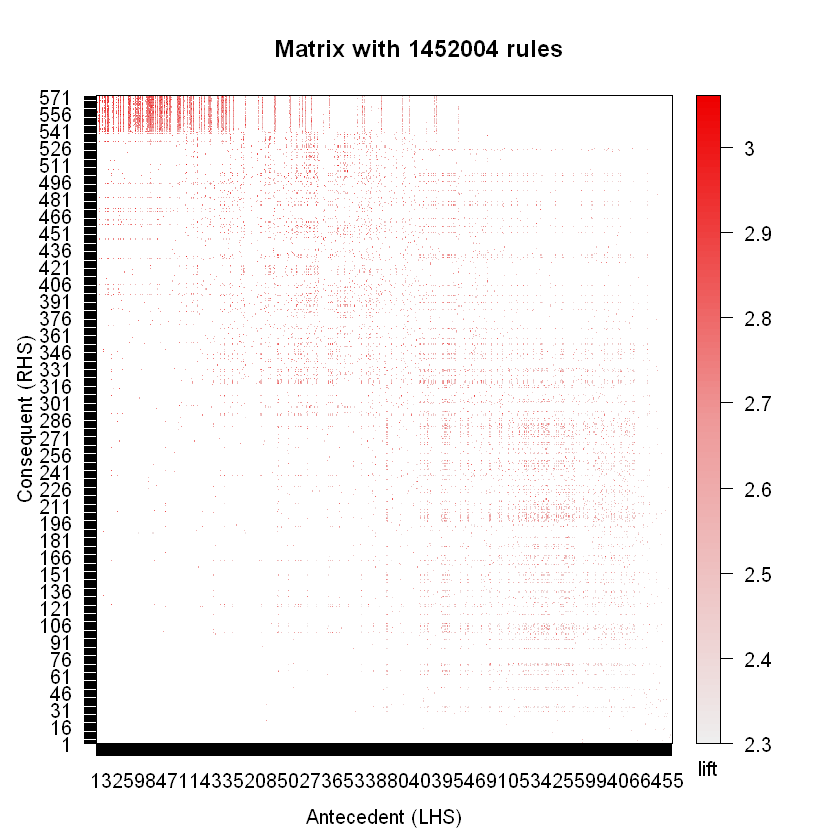

In [7]:
plot(sk_subr1,method="matrix",measure = "lift")

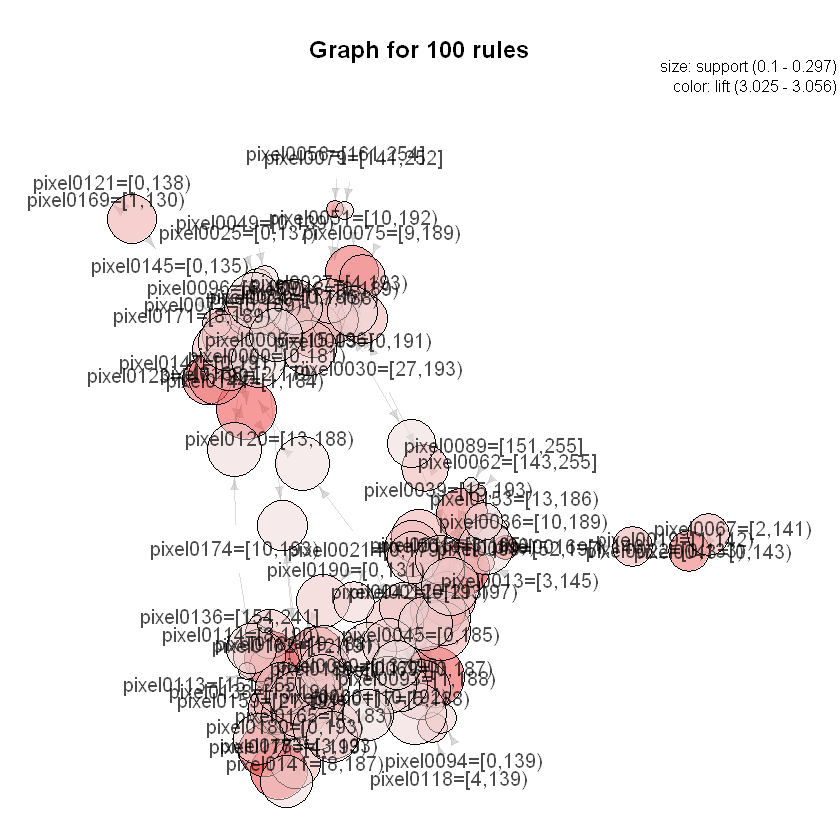

In [8]:
sk_subr2<-head(sort(sk_rules,by="lift"),100)
plot(sk_subr2,method = "graph")

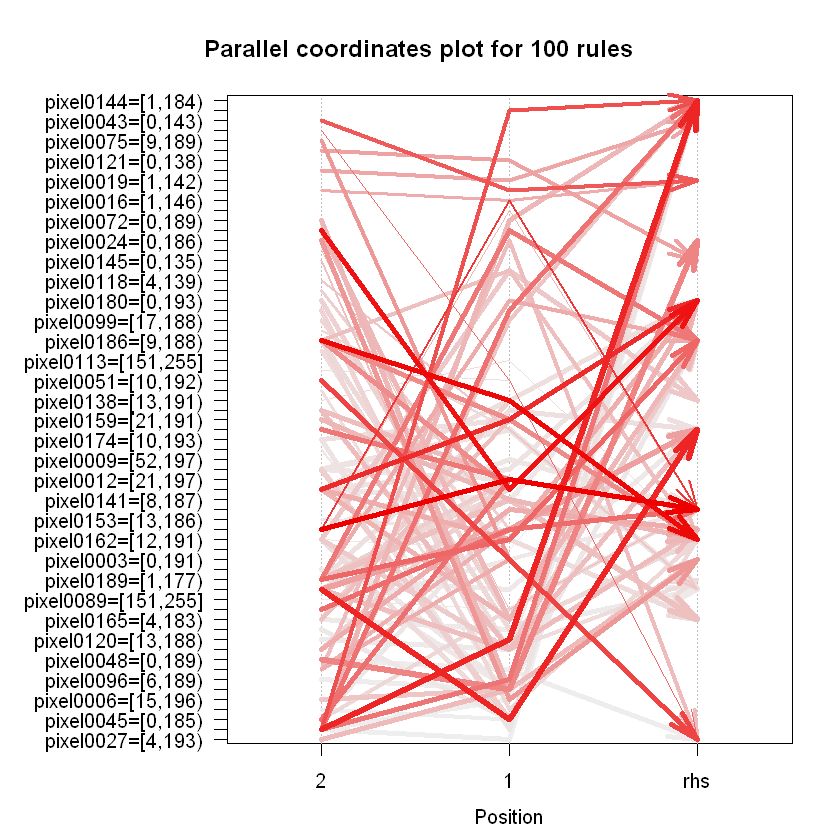

In [9]:
plot(sk_subr2, method="paracoord")

Warning message:
"plot: Too many rules supplied. Only plotting the best 100 rules using 'support' (change control parameter max if needed)"

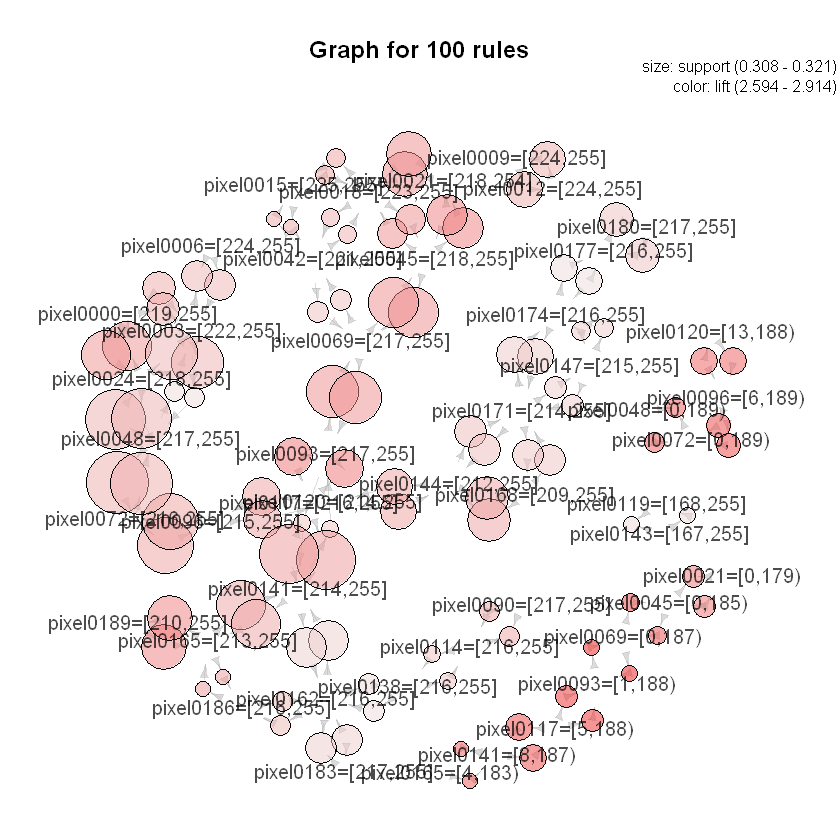

In [10]:
plot(sk_rules, method="graph")

## Association rules between two random pixels (pixel0003 and pixel0081)

In [85]:
skdata <- sk[,c(4,82)]
skdata

pixel0003,pixel0081
210,208
180,213
209,213
198,225
232,199
175,204
204,202
189,219
199,196
216,183


In [86]:
skdata$pixel0003 <- as.numeric(skdata$pixel0003)

In [87]:
skdata$pixel0001 <- as.numeric(skdata$pixel0081)

In [88]:
require("plyr")

In [89]:
sklist <- ddply(skdata,c("pixel0003"),
               function(df1)paste(df1$pixel0081,
                                 collapse = ","))
                

In [90]:
sklist # Displays list of associations

pixel0003,V1
0,187
5,176
13,179
18,172
34,197
37,124
39,207
53,"206,184"
54,213
55,188


In [91]:
sklist$pixel0003 <- NULL

In [92]:
sklist

V1
187
176
179
172
197
124
207
"206,184"
213
188


In [93]:
write.csv(sklist,"C:/Users/fadhi/Desktop/Stat 517/Final Project/sklist.csv", quote=FALSE, row.names=TRUE)

In [94]:
txn = read.transactions(file="C:/Users/fadhi/Desktop/Stat 517/Final Project/sklist.csv", rm.duplicates=TRUE, format="basket", sep=",", cols=1)

distribution of transactions with duplicates:
items
 1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24 25 26 27 
11  3  3  2  1  3  1  1  2  2  1  2  1  3  5  3  2  1  2  2  3  1  1  2  1  3 
28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 51 54 56 60 61 66 
 5  3  2  6  5  3  3  2  2  4  4  1  2  1  1  1  3  2  1  1  1  1  1 


In [95]:
txn

transactions in sparse format with
 201 transactions (rows) and
 246 items (columns)

In [96]:
txn@itemInfo$labels <- gsub("\"","",txn@itemInfo$labels)

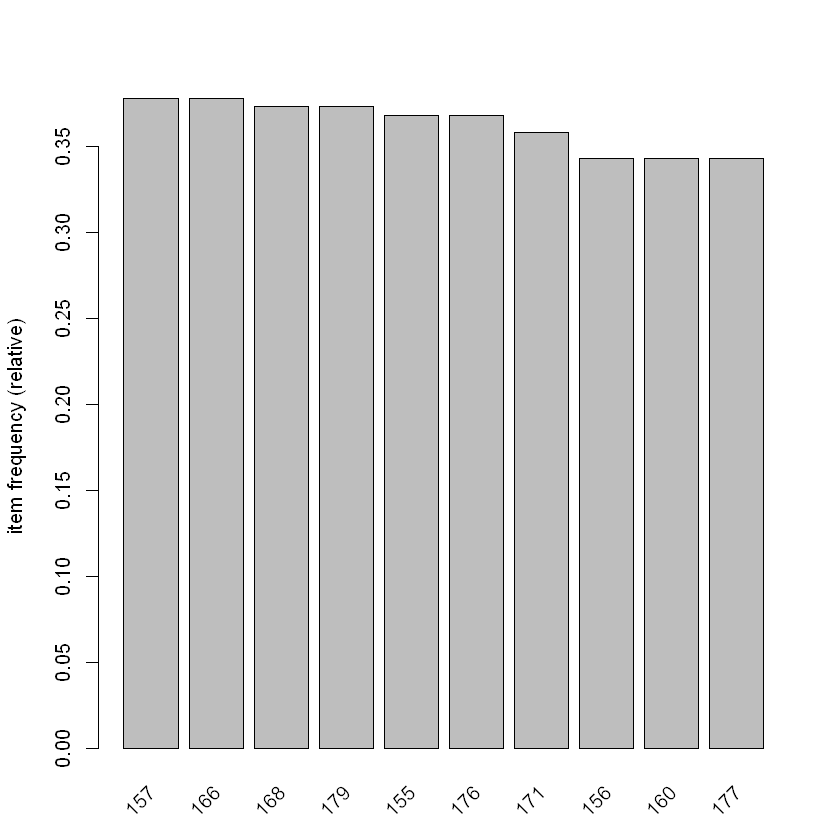

In [97]:
itemFrequencyPlot(txn, topN=10)

In [98]:
skrules <- apriori(txn, parameter= list(sup = 0.07, conf=0.8, target = "rules"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5    0.07      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 14 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[246 item(s), 201 transaction(s)] done [0.00s].
sorting and recoding items ... [156 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.82s].
writing ... [512877 rule(s)] done [0.27s].
creating S4 object  ... done [0.40s].


In [99]:
inspect(skrules)

         lhs                              rhs   support    confidence lift    
[1]      {82}                          => {156} 0.07462687 0.8333333  2.427536
[2]      {82}                          => {168} 0.07462687 0.8333333  2.233333
[3]      {75}                          => {171} 0.07462687 0.8333333  2.326389
[4]      {99}                          => {145} 0.07462687 0.8333333  2.701613
[5]      {99}                          => {177} 0.08457711 0.9444444  2.751208
[6]      {93}                          => {157} 0.07960199 0.8421053  2.227147
[7]      {87}                          => {168} 0.08457711 0.8095238  2.169524
[8]      {97}                          => {171} 0.09452736 0.8636364  2.410985
[9]      {98}                          => {192} 0.08457711 0.8500000  2.847500
[10]     {98}                          => {182} 0.07960199 0.8000000  2.593548
[11]     {98}                          => {190} 0.07960199 0.8000000  2.436364
[12]     {98}                          => {176} 0.07

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


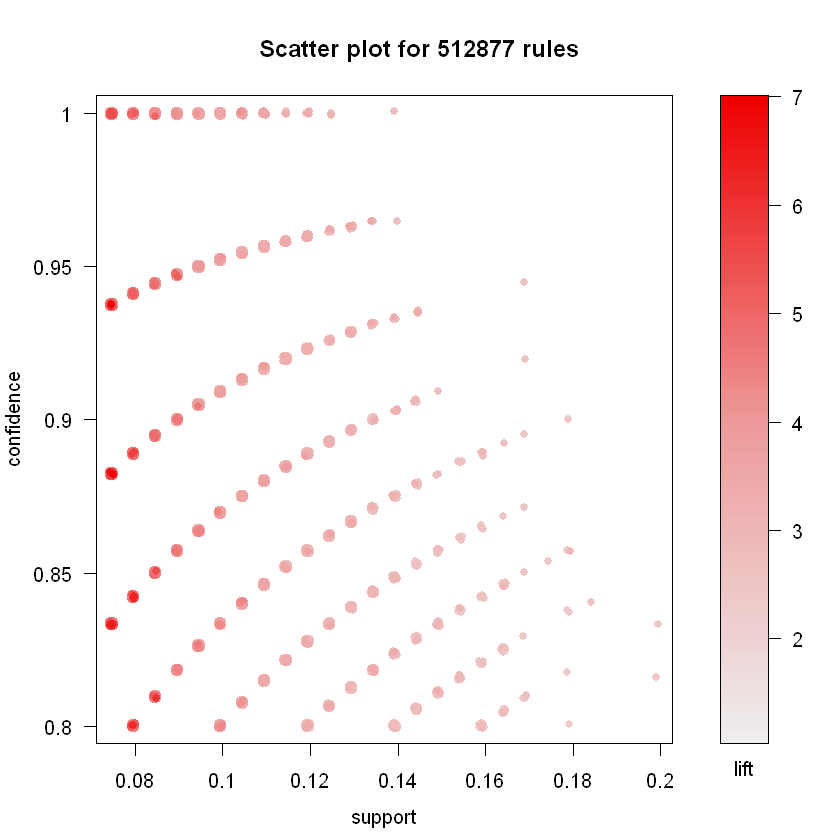

In [100]:
plot(skrules)

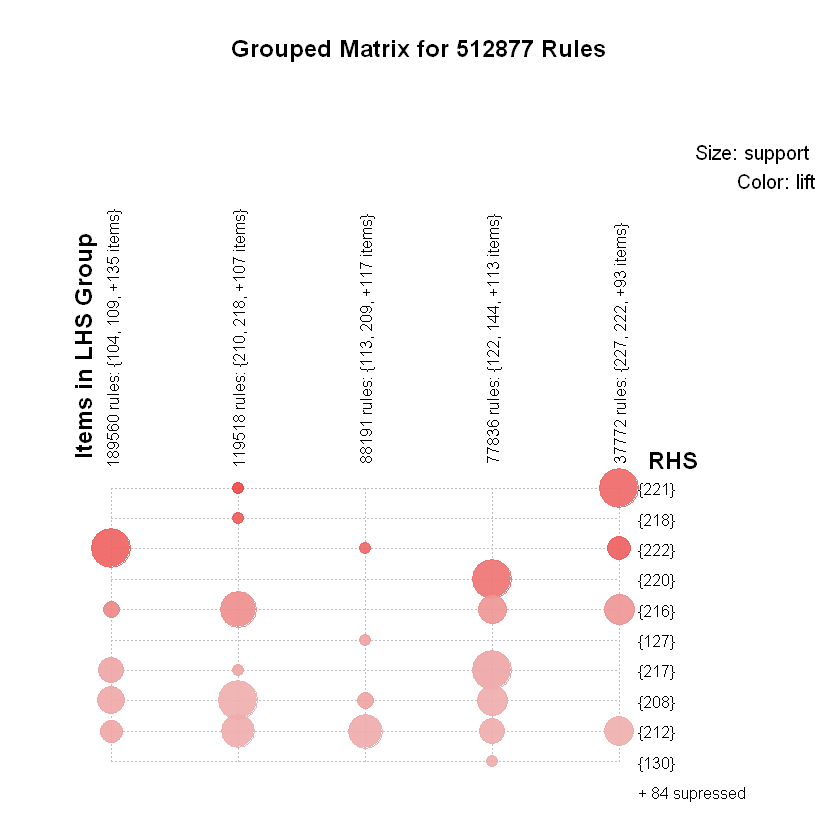

In [101]:
plot(skrules, method="grouped", control = list(k=5))